# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

C:\Users\m10sa\AppData\Local\Temp\ipykernel_25620\1912864649.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Loading and Merging the Datasets

In [2]:
df_X_train = pd.read_csv('df_inputs_train.csv', index_col=0)
df_y_train = pd.read_csv('df_targets_train.csv', index_col=0) 
df_X_test = pd.read_csv('df_inputs_test.csv', index_col=0)
df_y_test = pd.read_csv('df_targets_test.csv', index_col=0) 

In [3]:
df_prepr_train = pd.concat([df_X_train, df_y_train], axis=1)
df_prepr_test = pd.concat([df_X_test, df_y_test], axis=1)

In [4]:
df_prepr = pd.concat([df_prepr_train, df_prepr_test])

In [5]:
df_prepr_backup = df_prepr.copy()

In [6]:
df_prepr.shape

(242059, 247)

In [7]:
df_prepr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,dti:5.6-9.1,dti:9.1-13.3,dti:13.3-16.1,dti:16.1-18.2,dti:18.2-21,dti:21-24.5,dti:24.5-26.6,dti:26.6-35,dti:>35,good_bad
452448,11324653,13236804,13150,13150,13150.0,23.70,513.85,F,F1,NaN,...,0,0,0,1,0,0,0,0,0,1
363441,19607169,21829881,5000,5000,5000.0,10.15,161.69,B,B2,Truck Driver,...,1,0,0,0,0,0,0,0,0,1
465236,10179630,12031182,24000,24000,24000.0,22.40,668.33,E,E3,Bailiff,...,0,0,0,0,0,1,0,0,0,1
194452,1575006,1843180,25000,25000,25000.0,23.28,708.79,F,F2,"KPMG, LLP",...,0,1,0,0,0,0,0,0,0,1
45189,10155973,12008043,25000,25000,25000.0,6.62,767.60,A,A2,CEO,...,1,0,0,0,0,0,0,0,0,1


In [8]:
df_prepr.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'dti:5.6-9.1', 'dti:9.1-13.3', 'dti:13.3-16.1', 'dti:16.1-18.2',
       'dti:18.2-21', 'dti:21-24.5', 'dti:24.5-26.6', 'dti:26.6-35', 'dti:>35',
       'good_bad'],
      dtype='object', length=247)

In [9]:
df_defaults = df_prepr[df_prepr['loan_status'].isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'])]
# 'Late (31-120 days)' and 'Default' are not included

In [10]:
df_defaults.shape

(43236, 247)

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
df_defaults.isnull().sum()                  

id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
home_ownership                                                         0
annual_inc                                                             0
verification_status                                                    0
loan_status                                        

In [13]:
df_defaults['mths_since_last_delinq'].fillna(0, inplace=True)
df_defaults['mths_since_last_record'].fillna(0, inplace=True)

C:\Users\m10sa\AppData\Local\Temp\ipykernel_25620\2879224595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['mths_since_last_delinq'].fillna(0, inplace=True)
C:\Users\m10sa\AppData\Local\Temp\ipykernel_25620\2879224595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['mths_since_last_record'].fillna(0, inplace=True)


# Recovery Rate (RR) and Credit Conversion Factor (CCF)

### RR

In [14]:
# RR = recovery rate
df_defaults['RR'] = df_defaults['recoveries'] / df_defaults['funded_amnt']

C:\Users\m10sa\AppData\Local\Temp\ipykernel_25620\1607375620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['RR'] = df_defaults['recoveries'] / df_defaults['funded_amnt']


In [15]:
df_defaults['RR'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: RR, dtype: float64

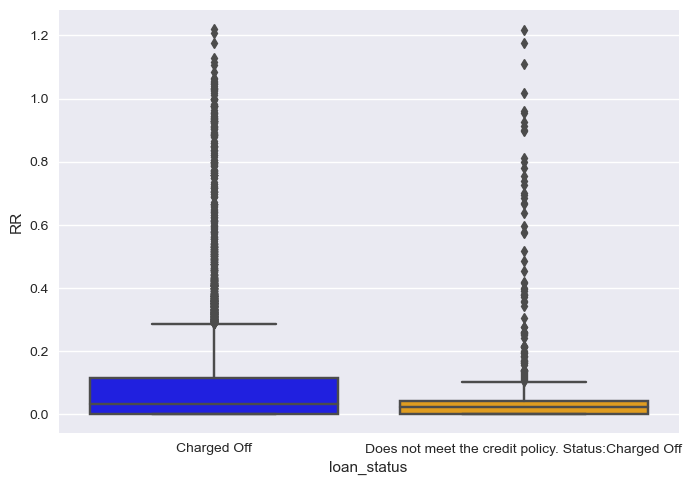

In [16]:
sns.boxplot(x='loan_status', y='RR', data=df_defaults, palette=['b', 'orange']);

In [17]:
df_defaults['RR'] = np.where(df_defaults['RR'] > 1, 1, df_defaults['RR'])
df_defaults['RR'] = np.where(df_defaults['RR'] < 0, 0, df_defaults['RR'])

C:\Users\m10sa\AppData\Local\Temp\ipykernel_25620\906624883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['RR'] = np.where(df_defaults['RR'] > 1, 1, df_defaults['RR'])
C:\Users\m10sa\AppData\Local\Temp\ipykernel_25620\906624883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['RR'] = np.where(df_defaults['RR'] < 0, 0, df_defaults['RR'])


In [18]:
df_defaults['RR'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: RR, dtype: float64

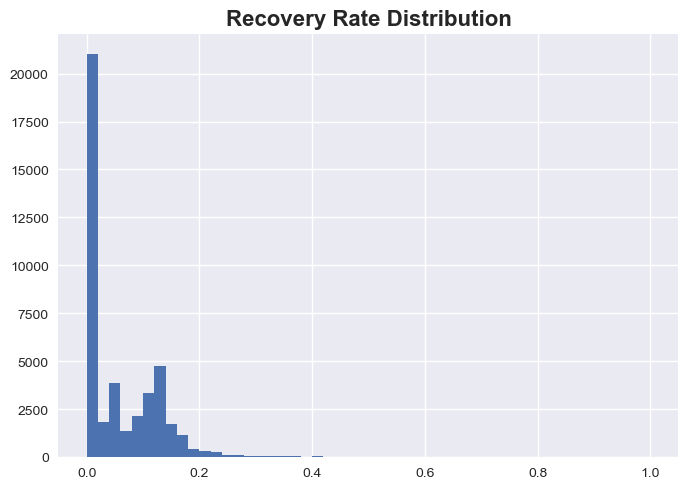

In [19]:
plt.hist(df_defaults['RR'], bins=50)
plt.title('Recovery Rate Distribution', fontdict={'fontweight':'bold', 'fontsize':16})
plt.show()

In [20]:
df_defaults['RR_bool'] = np.where(df_defaults['RR'] == 0, 0, 1)
df_defaults['RR_bool'].head()

C:\Users\m10sa\AppData\Local\Temp\ipykernel_25620\1926820219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['RR_bool'] = np.where(df_defaults['RR'] == 0, 0, 1)


464608    1
214960    1
38768     0
33947     0
39878     1
Name: RR_bool, dtype: int32

### CCF

In [21]:
# CCF = Credit Conversion Factor  (The percentage of the funded amount that the borrowers has not paid at the time of default)
# total_rec_prncp = Total Recovered Principal is the total payments made on the principal of the loan.
df_defaults['CCF'] = (df_defaults['funded_amnt'] - df_defaults['total_rec_prncp']) / df_defaults['funded_amnt']

C:\Users\m10sa\AppData\Local\Temp\ipykernel_25620\3418639199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaults['CCF'] = (df_defaults['funded_amnt'] - df_defaults['total_rec_prncp']) / df_defaults['funded_amnt']


In [22]:
df_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [23]:
df_defaults.to_csv('df_defaults.csv')

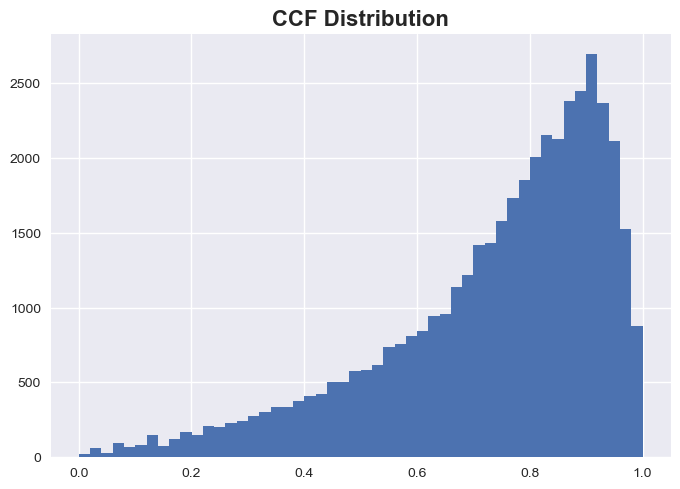

In [24]:
plt.hist(df_defaults['CCF'], bins=50)
plt.title('CCF Distribution', fontdict={'fontweight':'bold', 'fontsize':16})
plt.show()

# LGD Model

### Spiliting data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train_lgd_stage1, X_test_lgd_stage1, y_train_lgd_stage1, y_test_lgd_stage1 = train_test_split(df_defaults.drop(columns=['good_bad', 'RR', 'RR_bool', 'CCF']), df_defaults['RR_bool'], test_size=0.25, random_state=99)
# We drop the dependent variables

In [27]:
X_train_lgd_stage1['total_rev_hi_lim'].head()

451237     8800.0
259004    23500.0
331697    21000.0
449369    43500.0
12733      3025.0
Name: total_rev_hi_lim, dtype: float64

In [28]:
# List of all independent variables for the LGD and EAD models.
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [29]:
# List of the reference categories. 
ref_categories = ['grade:G', 'home_ownership:RENT', 'verification_status:Verified',
                  'purpose:credit_card','initial_list_status:f']

In [30]:
features = [i for i in features_all if i not in ref_categories]
features

['grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'home_ownership:MORTGAGE',
 'home_ownership:NONE',
 'home_ownership:OTHER',
 'home_ownership:OWN',
 'verification_status:Not Verified',
 'verification_status:Source Verified',
 'purpose:car',
 'purpose:debt_consolidation',
 'purpose:educational',
 'purpose:home_improvement',
 'purpose:house',
 'purpose:major_purchase',
 'purpose:medical',
 'purpose:moving',
 'purpose:other',
 'purpose:renewable_energy',
 'purpose:small_business',
 'purpose:vacation',
 'purpose:wedding',
 'initial_list_status:w',
 'term_int',
 'emp_length_int',
 'mths_since_issue_d',
 'mths_since_earliest_cr_line',
 'funded_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'total_acc',
 'acc_now_delinq',
 'total_rev_hi_lim']

## Stage 1 of LGD Model - Random Forest

In [31]:
X_train_lgd_stage1 = X_train_lgd_stage1[features_all]

In [32]:
X_train_lgd_stage1 = X_train_lgd_stage1.drop(columns=ref_categories)

In [33]:
X_train_lgd_stage1.isnull().sum().sum()

0

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf_rf_lgd_st1 = RandomForestClassifier(class_weight='balanced')
clf_rf_lgd_st1.fit(X_train_lgd_stage1, y_train_lgd_stage1)

RandomForestClassifier(class_weight='balanced')

In [36]:
importances = clf_rf_lgd_st1.feature_importances_     # Gini importance
importances

array([3.00579165e-03, 5.66584201e-03, 6.96579402e-03, 6.77277116e-03,
       5.01503229e-03, 3.35902354e-03, 1.18373134e-02, 2.99776518e-05,
       1.33067860e-04, 6.60598105e-03, 8.90109592e-03, 9.83293205e-03,
       1.30514529e-03, 1.15736695e-02, 2.18363294e-04, 4.39873135e-03,
       9.82049350e-04, 2.29444138e-03, 1.70727381e-03, 1.23625930e-03,
       4.93415405e-03, 2.02207231e-04, 3.21745121e-03, 1.06842472e-03,
       9.84527204e-04, 3.48641417e-02, 8.83891471e-03, 3.85456803e-02,
       1.22689909e-01, 7.26017242e-02, 5.99075838e-02, 6.24696024e-02,
       7.01473459e-02, 6.78044227e-02, 7.62916215e-02, 1.25086312e-02,
       2.74710060e-02, 3.81229030e-02, 1.40919983e-02, 5.08151628e-02,
       6.44088439e-03, 6.25028075e-02, 6.14046224e-04, 7.10242939e-02])

In [37]:
forest_importances = pd.Series(importances, index=features)
forest_importances

grade:A                                0.003006
grade:B                                0.005666
grade:C                                0.006966
grade:D                                0.006773
grade:E                                0.005015
grade:F                                0.003359
home_ownership:MORTGAGE                0.011837
home_ownership:NONE                    0.000030
home_ownership:OTHER                   0.000133
home_ownership:OWN                     0.006606
verification_status:Not Verified       0.008901
verification_status:Source Verified    0.009833
purpose:car                            0.001305
purpose:debt_consolidation             0.011574
purpose:educational                    0.000218
purpose:home_improvement               0.004399
purpose:house                          0.000982
purpose:major_purchase                 0.002294
purpose:medical                        0.001707
purpose:moving                         0.001236
purpose:other                          0

In [38]:
# clf_rf_lgd_st1.estimators_

In [39]:
std = np.std([tree.feature_importances_ for tree in clf_rf_lgd_st1.estimators_], axis=0)
std

array([6.95327965e-04, 1.29310192e-03, 1.74004351e-03, 1.49055156e-03,
       1.16300548e-03, 8.66784972e-04, 1.33082408e-03, 5.43577057e-05,
       1.18287858e-04, 1.00249085e-03, 1.46454687e-03, 2.39332198e-03,
       3.80184695e-04, 1.82592005e-03, 1.84713979e-04, 7.63514235e-04,
       3.75151964e-04, 5.96442662e-04, 4.56669005e-04, 3.53986323e-04,
       1.18917523e-03, 1.50836558e-04, 7.51234022e-04, 3.91753358e-04,
       3.71852895e-04, 1.38081386e-02, 1.44280068e-03, 3.18988428e-03,
       1.76306827e-02, 4.04536219e-03, 3.38990075e-03, 3.83533704e-03,
       3.93210940e-03, 3.34625669e-03, 4.55975607e-03, 1.33594550e-03,
       2.33448620e-03, 2.68893904e-03, 2.38589570e-03, 3.41539383e-03,
       1.84092924e-03, 3.06826156e-03, 2.79247192e-04, 3.95054065e-03])

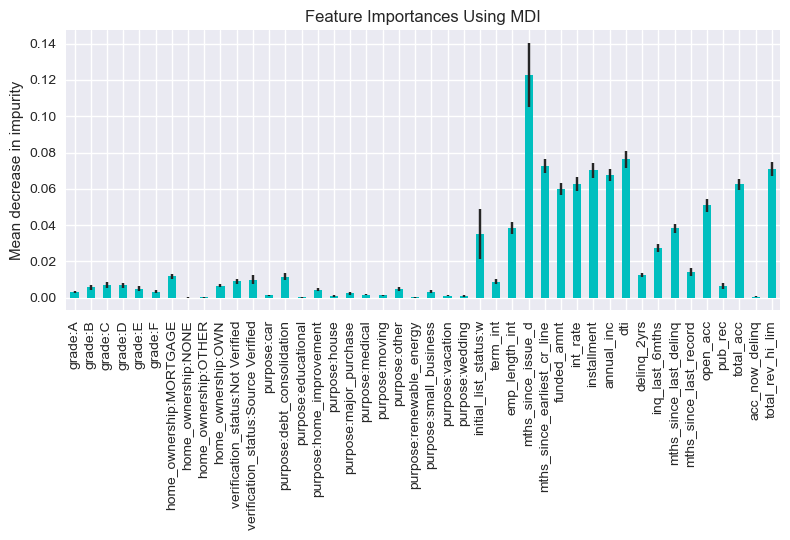

In [40]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='c')
ax.set_title("Feature Importances Using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout();

In [41]:
features = X_train_lgd_stage1.columns
features

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house', 'purpose:major_purchase',
       'purpose:medical', 'purpose:moving', 'purpose:other',
       'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding', 'initial_list_status:w',
       'term_int', 'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim'],
      dtype='object')

### Testing the Random Forest Model

In [42]:
X_test_lgd_stage1 = X_test_lgd_stage1[features]

In [43]:
y_pred_test_lgd_stage1 = clf_rf_lgd_st1.predict(X_test_lgd_stage1)
y_pred_test_lgd_stage1

array([0, 1, 1, ..., 0, 1, 1])

In [44]:
y_pred_test_proba_lgd_stage1 = clf_rf_lgd_st1.predict_proba(X_test_lgd_stage1)
y_pred_test_proba_lgd_stage1

array([[0.5 , 0.5 ],
       [0.25, 0.75],
       [0.35, 0.65],
       ...,
       [0.53, 0.47],
       [0.23, 0.77],
       [0.49, 0.51]])

In [45]:
y_pred_test_proba_lgd_stage1 = y_pred_test_proba_lgd_stage1[:, 1]
y_pred_test_proba_lgd_stage1

array([0.5 , 0.75, 0.65, ..., 0.47, 0.77, 0.51])

In [46]:
y_test_lgd_stage1_temp = y_test_lgd_stage1
y_test_lgd_stage1_temp.head(20)

42032     0
2728      0
15777     0
71592     0
109466    1
376316    1
262464    0
17655     1
328335    1
217770    0
166018    0
286034    0
286607    0
981       1
41892     1
247684    0
302163    0
85043     1
165376    1
102845    0
Name: RR_bool, dtype: int32

In [47]:
y_test_lgd_stage1_temp.reset_index(drop=True, inplace=True)

In [48]:
df_true_pred_probs = pd.concat([y_test_lgd_stage1_temp, pd.DataFrame(y_pred_test_proba_lgd_stage1), pd.DataFrame(y_pred_test_lgd_stage1)], axis=1)
df_true_pred_probs.columns = ['y_test_lgd_stage1', 'y_pred_test_proba_lgd_stage1', 'y_pred_test_lgd_stage1']
df_true_pred_probs.head(20)

,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
0,0,0.50,0
1,0,0.75,1
2,0,0.65,1
3,0,0.50,0
4,1,0.60,1
5,1,0.23,0
6,0,0.51,1
7,1,0.69,1
8,1,0.37,0
9,0,0.63,1


In [49]:
df_true_pred_probs.index = X_test_lgd_stage1.index

In [50]:
df_true_pred_probs.head()

,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
42032,0,0.50,0
2728,0,0.75,1
15777,0,0.65,1
71592,0,0.50,0
109466,1,0.60,1


### Measuring the Accuracy of the Random Forest Model

In [51]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [52]:
accuracy_score(y_true=y_test_lgd_stage1, y_pred=y_pred_test_lgd_stage1)

0.6600980664261263

In [53]:
f1_score(y_true=y_test_lgd_stage1, y_pred=y_pred_test_lgd_stage1, average=None, labels=[0,1])

array([0.57953765, 0.71475155])

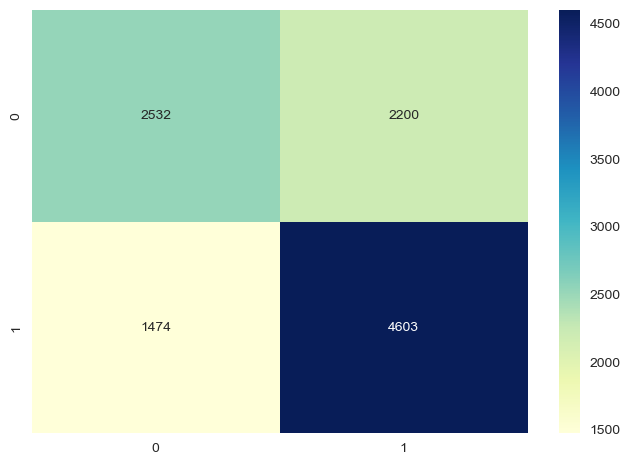

In [54]:
labels = [0,1]
cm = confusion_matrix(y_true=y_test_lgd_stage1, y_pred=y_pred_test_lgd_stage1, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [55]:
print(classification_report(y_true=y_test_lgd_stage1,y_pred=y_pred_test_lgd_stage1))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58      4732
           1       0.68      0.76      0.71      6077

    accuracy                           0.66     10809
   macro avg       0.65      0.65      0.65     10809
weighted avg       0.66      0.66      0.66     10809



### Area Under the ROC Curve (AUROC)

In [56]:
fpr, tpr, thresholds = roc_curve(df_true_pred_probs['y_test_lgd_stage1'], df_true_pred_probs['y_pred_test_proba_lgd_stage1'])

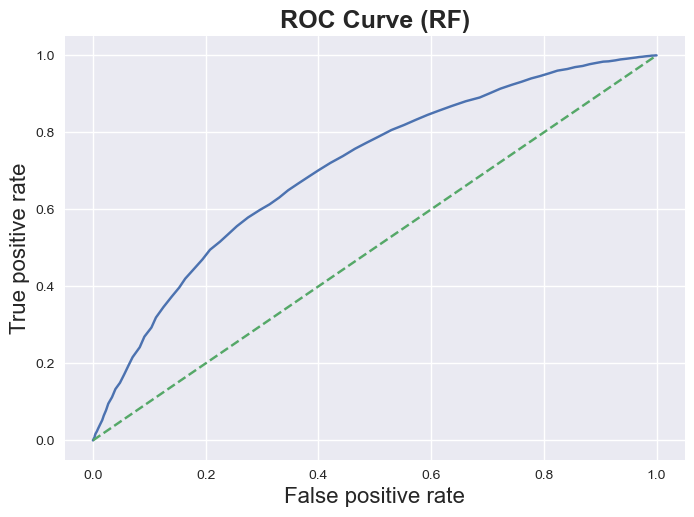

In [57]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--') 
plt.xlabel('False positive rate', size=16)
plt.ylabel('True positive rate', size=16)
plt.title('ROC Curve (RF)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [58]:
AUROC = roc_auc_score(df_true_pred_probs['y_test_lgd_stage1'], df_true_pred_probs['y_pred_test_proba_lgd_stage1'])
AUROC

0.7063314228460872

### Gini Coefficient

In [59]:
df_true_pred_probs = df_true_pred_probs.sort_values('y_pred_test_proba_lgd_stage1')
df_true_pred_probs.head()

,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
296262,0,0.03,0
310574,0,0.07,0
369988,0,0.08,0
343960,0,0.09,0
386326,0,0.10,0


In [60]:
df_true_pred_probs.tail()

,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
30413,1,0.95,1
30641,1,0.96,1
10736,1,0.97,1
220690,1,0.97,1
34113,0,0.98,1


In [61]:
df_true_pred_probs = df_true_pred_probs.reset_index()
df_true_pred_probs.head()

,index,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
0,296262,0,0.03,0
1,310574,0,0.07,0
2,369988,0,0.08,0
3,343960,0,0.09,0
4,386326,0,0.10,0


In [62]:
df_true_pred_probs['Cumulative N Population'] = df_true_pred_probs.index + 1    # Cumulative number of all observations
df_true_pred_probs['Cumulative N Good'] = df_true_pred_probs['y_test_lgd_stage1'].cumsum() # Cumulative number of 'good' borrowers
df_true_pred_probs['Cumulative N Bad'] = df_true_pred_probs['Cumulative N Population'] - df_true_pred_probs['Cumulative N Good']
# Cumulative number of 'bad' borrowers

In [63]:
df_true_pred_probs.head()

,index,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,296262,0,0.03,0,1,0,1
1,310574,0,0.07,0,2,0,2
2,369988,0,0.08,0,3,0,3
3,343960,0,0.09,0,4,0,4
4,386326,0,0.10,0,5,0,5


In [64]:
df_true_pred_probs['Cumulative Perc Population'] = df_true_pred_probs['Cumulative N Population'] / (df_true_pred_probs.index[-1] + 1)
# Cumulative percentage of all observations
df_true_pred_probs['Cumulative Perc Good'] = df_true_pred_probs['Cumulative N Good'] / df_true_pred_probs['y_test_lgd_stage1'].sum()
# Cumulative percentage of 'good' borrowers
df_true_pred_probs['Cumulative Perc Bad'] = df_true_pred_probs['Cumulative N Bad'] / ((df_true_pred_probs.index[-1] + 1) - df_true_pred_probs['y_test_lgd_stage1'].sum())
# Cumulative percentage of 'bad' borrowers

In [65]:
df_true_pred_probs.head()

,index,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,296262,0,0.03,0,1,0,1,0.000093,0.0,0.000211
1,310574,0,0.07,0,2,0,2,0.000185,0.0,0.000423
2,369988,0,0.08,0,3,0,3,0.000278,0.0,0.000634
3,343960,0,0.09,0,4,0,4,0.000370,0.0,0.000845
4,386326,0,0.10,0,5,0,5,0.000463,0.0,0.001057


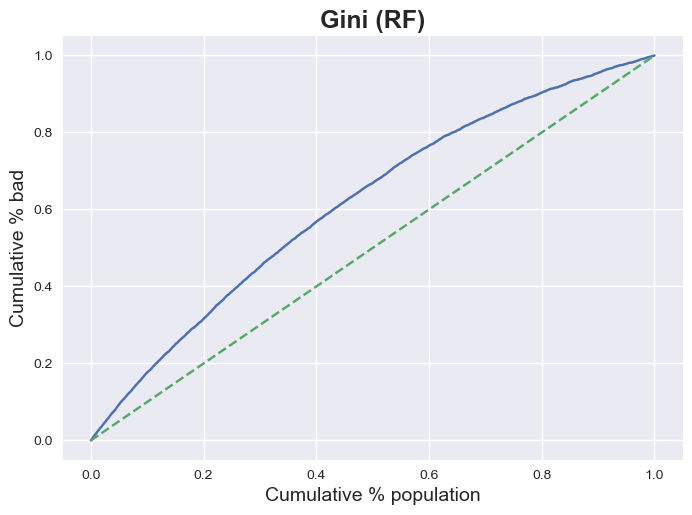

In [66]:
plt.plot(df_true_pred_probs['Cumulative Perc Population'], df_true_pred_probs['Cumulative Perc Bad'])
plt.plot([0, 1], [0, 1], '--') 
plt.xlabel('Cumulative % population', size=14)
plt.ylabel('Cumulative % bad', size=14)
plt.title('Gini (RF)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [67]:
Gini = 2 * AUROC  - 1
Gini

0.4126628456921744

### Kolmogorov-Smirnov Coefficient

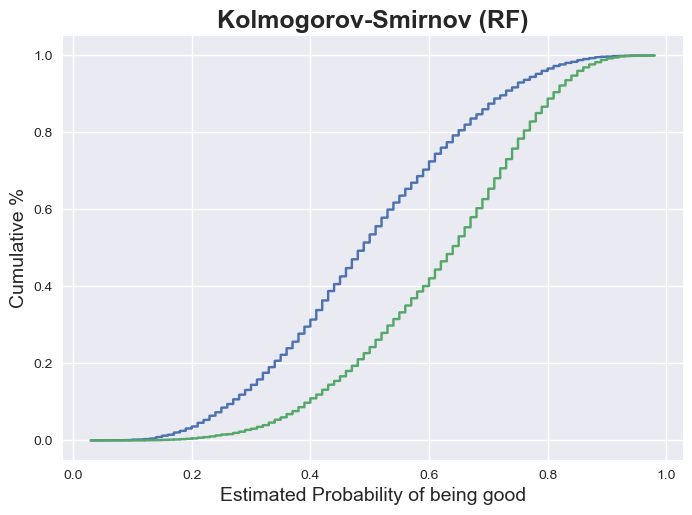

In [68]:
plt.plot(df_true_pred_probs['y_pred_test_proba_lgd_stage1'], df_true_pred_probs['Cumulative Perc Bad'])
plt.plot(df_true_pred_probs['y_pred_test_proba_lgd_stage1'], df_true_pred_probs['Cumulative Perc Good'])
plt.xlabel('Estimated Probability of being good', size=14)       # Predicted Probability of being Good (Non-defaulted)
plt.ylabel('Cumulative %', size=14)
plt.title('Kolmogorov-Smirnov (RF)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [69]:
KS = max(df_true_pred_probs['Cumulative Perc Bad'] - df_true_pred_probs['Cumulative Perc Good'])
KS

0.305477806582223

### Saving the Model

In [70]:
import pickle 
with open('lgd_model_stage1.sav', 'wb') as f:
    pickle.dump('clf_rf_lgd_st1', f)

## Stage 1 of LGD Model - Artificial Neural Networks

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

X_train_lgd_stage1 = scaler.fit_transform(X_train_lgd_stage1)
X_test_lgd_stage1 = scaler.transform(X_test_lgd_stage1)

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
model = Sequential()

u1 = len(features)
model.add(Dense(u1, activation='relu'))

u2 = round(len(features) * 0.5)
model.add(Dense(u2, activation='relu'))
model.add(Dropout(0.2))                      

u3 = round(len(features) * 0.25)
model.add(Dense(u3, activation='relu'))
model.add(Dropout(0.2))  
                
model.add(Dense(1, activation='sigmoid'))   
                
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])    # adam, SGD, Adagrad, RMSprop    

In [75]:
y_test_lgd_stage1.value_counts()

RR_bool
1    6077
0    4732
Name: count, dtype: int64

In [76]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0, verbose=1)   
model.fit(x=X_train_lgd_stage1, y=y_train_lgd_stage1, batch_size=1024, epochs=30, 
          validation_data=(X_test_lgd_stage1,y_test_lgd_stage1), callbacks=[early_stop]);

Epoch 1/30


32/32 [==============================] - 2s 12ms/step - loss: 0.6912 - accuracy: 0.5364 - val_loss: 0.6732 - val_accuracy: 0.6032
Epoch 2/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6695 - accuracy: 0.6020 - val_loss: 0.6527 - val_accuracy: 0.6432
Epoch 3/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6530 - accuracy: 0.6291 - val_loss: 0.6396 - val_accuracy: 0.6476
Epoch 4/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6454 - accuracy: 0.6377 - val_loss: 0.6364 - val_accuracy: 0.6491
Epoch 5/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6393 - accuracy: 0.6478 - val_loss: 0.6341 - val_accuracy: 0.6528
Epoch 6/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6366 - accuracy: 0.6513 - val_loss: 0.6307 - val_accuracy: 0.6549
Epoch 7/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6365 - accuracy: 0.6521 - val_loss: 0.6292 - val_accuracy: 0.6573
Epoch 8/30
32/32 

In [77]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.691216,0.536405,0.673194,0.603201
1,0.669540,0.601968,0.652687,0.643168
2,0.653044,0.629075,0.639562,0.647608
3,0.645359,0.637709,0.636426,0.649089
4,0.639344,0.647824,0.634084,0.652789
5,0.636628,0.651278,0.630659,0.654917
6,0.636508,0.652142,0.629198,0.657323
7,0.631653,0.656305,0.627325,0.658433
8,0.629438,0.657107,0.626022,0.660191
9,0.627652,0.659080,0.625190,0.657878


In [78]:
losses_loss = losses.loc[:,['loss','val_loss']]

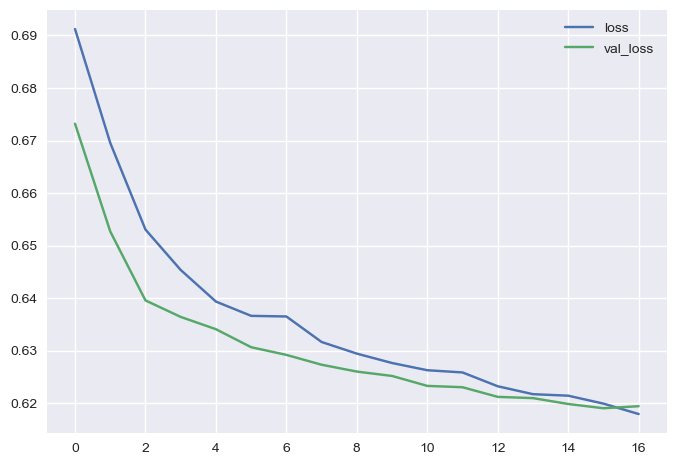

In [79]:
losses_loss.plot();

In [80]:
y_pred_test = np.round(model.predict(X_test_lgd_stage1)).astype('int')
y_pred_test

338/338 [==============================] - 1s 2ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

### Confusion Matrix  (ANNs)

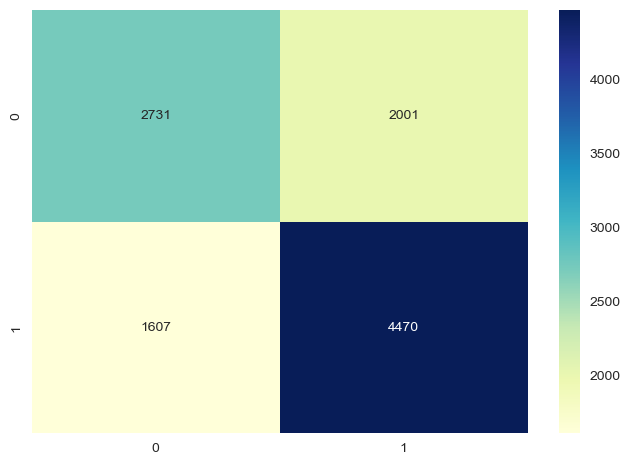

In [81]:
labels = [0,1]
cm = confusion_matrix(y_test_lgd_stage1, y_pred_test, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [82]:
print(classification_report(y_true=y_test_lgd_stage1,y_pred=y_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      4732
           1       0.69      0.74      0.71      6077

    accuracy                           0.67     10809
   macro avg       0.66      0.66      0.66     10809
weighted avg       0.66      0.67      0.66     10809



In [83]:
model.save('lgd_st1_ann_model.h5')

C:\Users\m10sa\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
#X_test_lgd_stage1 = X_test_lgd_stage1[features]

In [85]:
y_pred_test_proba_lgd_stage1 = model.predict(X_test_lgd_stage1)
y_pred_test_proba_lgd_stage1

338/338 [==============================] - 1s 2ms/step


array([[0.7369679 ],
       [0.70710045],
       [0.69492745],
       ...,
       [0.5195735 ],
       [0.61988926],
       [0.63631886]], dtype=float32)

In [86]:
y_test_lgd_stage1_temp = y_test_lgd_stage1
y_test_lgd_stage1_temp

0        0
1        0
2        0
3        0
4        1
5        1
6        0
7        1
8        1
9        0
10       0
11       0
12       0
13       1
14       1
15       0
16       0
17       1
18       1
19       0
20       1
21       0
22       1
23       1
24       1
25       1
26       1
27       0
28       0
29       0
30       1
31       1
32       1
33       1
34       1
35       0
36       1
37       1
38       1
39       0
40       0
41       0
42       1
43       1
44       0
45       0
46       1
47       1
48       1
49       0
50       1
51       1
52       0
53       1
54       1
55       1
56       1
57       0
58       1
59       0
60       1
61       1
62       1
63       1
64       1
65       1
66       1
67       1
68       1
69       1
70       0
71       1
72       1
73       1
74       1
75       1
76       1
77       1
78       1
79       0
80       0
81       0
82       1
83       0
84       0
85       1
86       1
87       1
88       1
89       0
90       1

In [87]:
y_test_lgd_stage1_temp.reset_index(drop=True, inplace=True)

In [88]:
df_true_pred_probs = pd.concat([y_test_lgd_stage1_temp, pd.DataFrame(y_pred_test_proba_lgd_stage1), pd.DataFrame(y_pred_test_lgd_stage1)], axis=1)
df_true_pred_probs.columns = ['y_test_lgd_stage1', 'y_pred_test_proba_lgd_stage1', 'y_pred_test_lgd_stage1']
df_true_pred_probs.head(20)

,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
0,0,0.736968,0
1,0,0.707100,1
2,0,0.694927,1
3,0,0.454014,0
4,1,0.746252,1
5,1,0.295949,0
6,0,0.390439,1
7,1,0.667073,1
8,1,0.359513,0
9,0,0.692979,1


In [89]:
fpr, tpr, thresholds = roc_curve(df_true_pred_probs['y_test_lgd_stage1'], df_true_pred_probs['y_pred_test_proba_lgd_stage1'])

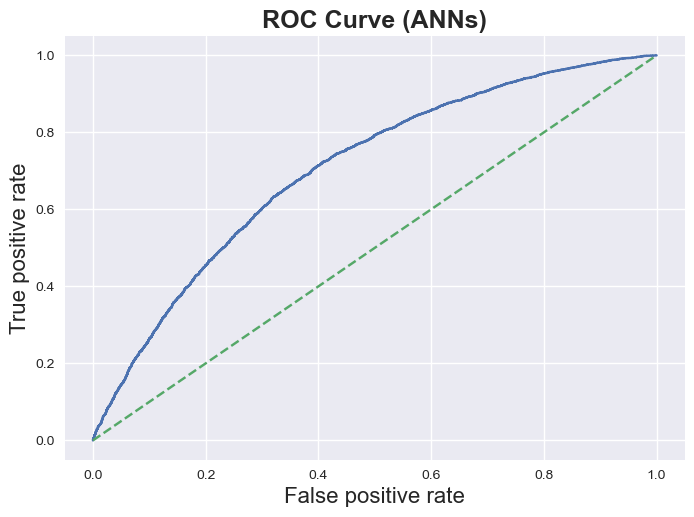

In [90]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--') 
plt.xlabel('False positive rate', size=16)
plt.ylabel('True positive rate', size=16)
plt.title('ROC Curve (ANNs)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [91]:
AUROC = roc_auc_score(df_true_pred_probs['y_test_lgd_stage1'], df_true_pred_probs['y_pred_test_proba_lgd_stage1'])
AUROC

0.7052281366309038

### Gini Coefficient

In [92]:
df_true_pred_probs = df_true_pred_probs.sort_values('y_pred_test_proba_lgd_stage1')
df_true_pred_probs.head()

,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
4573,1,0.119595,0
4556,0,0.126600,0
4557,0,0.147868,0
4652,0,0.147934,0
6796,0,0.151620,0


In [93]:
df_true_pred_probs.tail()

,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
9312,1,0.891238,1
7713,1,0.895501,1
9085,1,0.895550,1
8637,1,0.899049,1
6199,1,0.911793,1


In [94]:
df_true_pred_probs = df_true_pred_probs.reset_index()
df_true_pred_probs.head()

,index,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1
0,4573,1,0.119595,0
1,4556,0,0.126600,0
2,4557,0,0.147868,0
3,4652,0,0.147934,0
4,6796,0,0.151620,0


In [95]:
df_true_pred_probs['Cumulative N Population'] = df_true_pred_probs.index + 1    # Cumulative number of all observations
df_true_pred_probs['Cumulative N Good'] = df_true_pred_probs['y_test_lgd_stage1'].cumsum() # Cumulative number of 'good' borrowers
df_true_pred_probs['Cumulative N Bad'] = df_true_pred_probs['Cumulative N Population'] - df_true_pred_probs['Cumulative N Good']
# Cumulative number of 'bad' borrowers

In [96]:
df_true_pred_probs.head()

,index,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,4573,1,0.119595,0,1,1,0
1,4556,0,0.126600,0,2,1,1
2,4557,0,0.147868,0,3,1,2
3,4652,0,0.147934,0,4,1,3
4,6796,0,0.151620,0,5,1,4


In [97]:
df_true_pred_probs['Cumulative Perc Population'] = df_true_pred_probs['Cumulative N Population'] / (df_true_pred_probs.index[-1] + 1)
# Cumulative percentage of all observations
df_true_pred_probs['Cumulative Perc Good'] = df_true_pred_probs['Cumulative N Good'] / df_true_pred_probs['y_test_lgd_stage1'].sum()
# Cumulative percentage of 'good' borrowers
df_true_pred_probs['Cumulative Perc Bad'] = df_true_pred_probs['Cumulative N Bad'] / ((df_true_pred_probs.index[-1] + 1) - df_true_pred_probs['y_test_lgd_stage1'].sum())
# Cumulative percentage of 'bad' borrowers

In [98]:
df_true_pred_probs.head()

,index,y_test_lgd_stage1,y_pred_test_proba_lgd_stage1,y_pred_test_lgd_stage1,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,4573,1,0.119595,0,1,1,0,0.000093,0.000165,0.000000
1,4556,0,0.126600,0,2,1,1,0.000185,0.000165,0.000211
2,4557,0,0.147868,0,3,1,2,0.000278,0.000165,0.000423
3,4652,0,0.147934,0,4,1,3,0.000370,0.000165,0.000634
4,6796,0,0.151620,0,5,1,4,0.000463,0.000165,0.000845


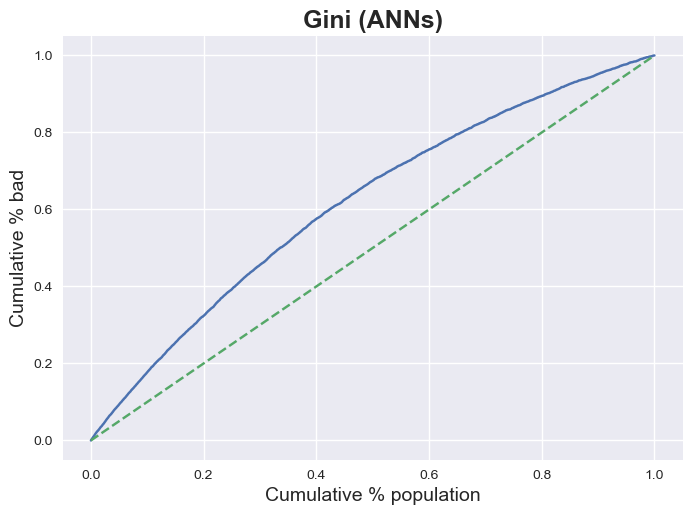

In [99]:
plt.plot(df_true_pred_probs['Cumulative Perc Population'], df_true_pred_probs['Cumulative Perc Bad'])
plt.plot([0, 1], [0, 1], '--') 
plt.xlabel('Cumulative % population', size=14)
plt.ylabel('Cumulative % bad', size=14)
plt.title('Gini (ANNs)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [100]:
Gini = 2 * AUROC  - 1
Gini

0.41045627326180756

### Kolmogorov-Smirnov Coefficient

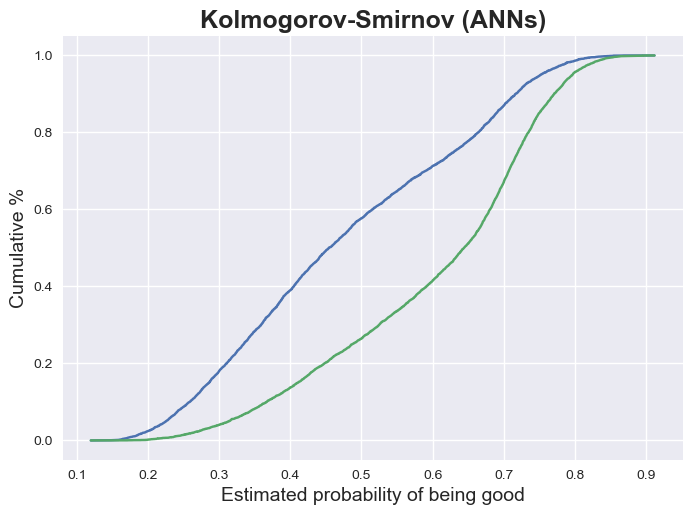

In [101]:
plt.plot(df_true_pred_probs['y_pred_test_proba_lgd_stage1'], df_true_pred_probs['Cumulative Perc Bad'])
plt.plot(df_true_pred_probs['y_pred_test_proba_lgd_stage1'], df_true_pred_probs['Cumulative Perc Good'])
plt.xlabel('Estimated probability of being good', size=14)       # Predicted Probability of being Good (Non-defaulted)
plt.ylabel('Cumulative %', size=14)
plt.title('Kolmogorov-Smirnov (ANNs)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [102]:
KS = max(df_true_pred_probs['Cumulative Perc Bad'] - df_true_pred_probs['Cumulative Perc Good'])
KS

0.31509752067403235

## Stage 2 of LGD Model - Multiple Linear Regression 

In [103]:
df_lgd_stage2 = df_defaults[df_defaults['RR_bool'] == 1]

In [104]:
X_train_lgd_stage2, X_test_lgd_stage2, y_train_lgd_stage2, y_test_lgd_stage2 = train_test_split(df_lgd_stage2.drop(columns=['good_bad', 'RR', 'RR_bool', 'CCF']), df_lgd_stage2['RR'], test_size=0.25, random_state=42)
# We drop the dependent variables 

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [106]:
X_train_lgd_stage2 = X_train_lgd_stage2[features_all]

In [107]:
X_train_lgd_stage2 = X_train_lgd_stage2.drop(columns=ref_categories)

In [108]:
lm_lgd_st2 = LinearRegression()
lm_lgd_st2.fit(X_train_lgd_stage2, y_train_lgd_stage2)

LinearRegression()

In [109]:
features = X_train_lgd_stage2.columns
features

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house', 'purpose:major_purchase',
       'purpose:medical', 'purpose:moving', 'purpose:other',
       'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding', 'initial_list_status:w',
       'term_int', 'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim'],
      dtype='object')

In [110]:
lm_lgd_st2.intercept_

0.3472564639673975

In [111]:
lm_lgd_st2.coef_

array([-7.81220767e-02, -5.95875497e-02, -4.50370505e-02, -3.21775478e-02,
       -1.43600425e-02, -3.87772676e-03,  2.26121120e-03,  1.74347363e-01,
        3.82777425e-02,  6.75399440e-03,  2.99194313e-03, -1.96094966e-03,
       -2.65507626e-03,  4.99070234e-04,  2.62459781e-02, -1.64997081e-03,
       -4.61472533e-03,  1.49278496e-03,  1.05896949e-02,  1.88513481e-02,
        5.33947297e-03,  2.85577263e-02,  1.64693847e-03,  7.03749515e-03,
        2.02862282e-02,  1.64282398e-02,  2.47632038e-04, -5.93016606e-05,
       -1.48621997e-03,  1.70018840e-05,  2.80145783e-07, -3.14503281e-03,
       -2.61557624e-05,  7.64363819e-08,  1.90749282e-04,  1.65254197e-03,
        9.74219969e-04, -2.25473020e-05, -4.03971413e-05, -1.12058241e-03,
        4.20679328e-03,  4.77746371e-04,  3.46261387e-03,  2.36022984e-07])

In [112]:
lm_lgd_st2.coef_.shape

(44,)

In [113]:
d = {'Feature Name':features, 'Coefficient':lm_lgd_st2.coef_} 
summary_table = pd.DataFrame(data=d)
new_row = pd.DataFrame({'Feature Name':'intercept', 'Coefficient':lm_lgd_st2.intercept_}, index=[0])
summary_table = pd.concat([new_row, summary_table], axis=0).reset_index(drop=True)              
summary_table

,Feature Name,Coefficient
0,intercept,3.472565e-01
1,grade:A,-7.812208e-02
2,grade:B,-5.958755e-02
3,grade:C,-4.503705e-02
4,grade:D,-3.217755e-02
5,grade:E,-1.436004e-02
6,grade:F,-3.877727e-03
7,home_ownership:MORTGAGE,2.261211e-03
8,home_ownership:NONE,1.743474e-01
9,home_ownership:OTHER,3.827774e-02


In [114]:
X_test_lgd_stage2 = X_test_lgd_stage2[features_all]
X_test_lgd_stage2 = X_test_lgd_stage2.drop(columns=ref_categories)

In [115]:
y_pred_test_lgd_stage2 = lm_lgd_st2.predict(X_test_lgd_stage2)

In [116]:
y_test_lgd_stage2_temp = y_test_lgd_stage2
y_test_lgd_stage2_temp = y_test_lgd_stage2_temp.reset_index(drop=True)

C:\Users\m10sa\AppData\Local\Temp\ipykernel_25620\895813404.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_lgd_stage2 - y_pred_test_lgd_stage2, bins=100)


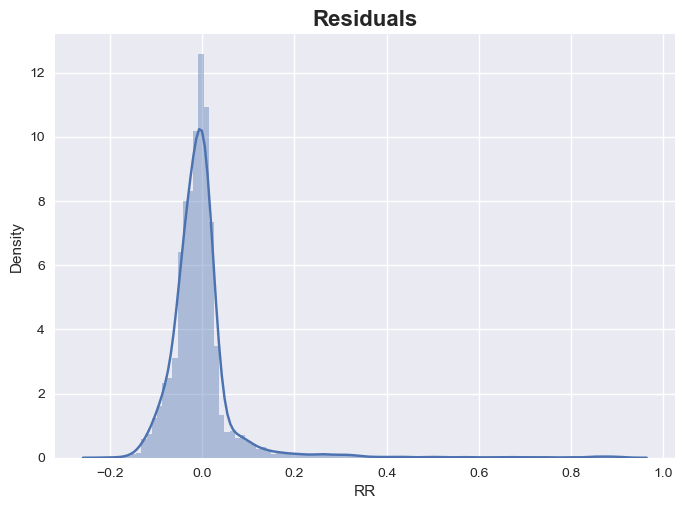

In [117]:
sns.distplot(y_test_lgd_stage2 - y_pred_test_lgd_stage2, bins=100)
plt.title('Residuals', fontdict={'fontweight':'bold', 'fontsize':16});

In [118]:
y_test_lgd_stage2.describe()

count    6093.000000
mean        0.106835
std         0.095652
min         0.000036
25%         0.049969
50%         0.104736
75%         0.134510
max         1.000000
Name: RR, dtype: float64

In [119]:
mean_squared_error(y_true=y_test_lgd_stage2, y_pred= y_pred_test_lgd_stage2)

0.00823228368829304

In [120]:
mean_absolute_error(y_true=y_test_lgd_stage2, y_pred= y_pred_test_lgd_stage2)

0.04420281225520534

### Saving the Model

In [121]:
with open('lgd_model_stage2.sav', 'wb') as f:
    pickle.dump(lm_lgd_st2, f)

## LGD Model - Combining Stages 1 and  2

In [122]:
# inputs = X_test_lgd_stage1    ***
y_pred_test_lgd_stage2_all = lm_lgd_st2.predict(X_test_lgd_stage1)
y_pred_test_lgd_stage2_all

C:\Users\m10sa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.34381932, 0.30575131, 0.33154815, ..., 0.34130682, 0.31337371,
       0.30378535])

In [123]:
y_pred_test_lgd = y_pred_test_lgd_stage1 * y_pred_test_lgd_stage2_all           # RR
y_pred_test_lgd

array([0.        , 0.30575131, 0.33154815, ..., 0.        , 0.31337371,
       0.30378535])

In [124]:
pd.DataFrame(y_pred_test_lgd).describe()   

,0
count,10809.000000
mean,0.196417
std,0.151675
min,0.000000
25%,0.000000
50%,0.291742
75%,0.315693
max,0.504162


In [125]:
y_pred_test_lgd = np.where(y_pred_test_lgd < 0, 0, y_pred_test_lgd)     
y_pred_test_lgd = np.where(y_pred_test_lgd > 1, 1, y_pred_test_lgd)
y_pred_test_lgd

array([0.        , 0.30575131, 0.33154815, ..., 0.        , 0.31337371,
       0.30378535])

In [126]:
pd.DataFrame(y_pred_test_lgd).describe()

,0
count,10809.000000
mean,0.196417
std,0.151675
min,0.000000
25%,0.000000
50%,0.291742
75%,0.315693
max,0.504162


# EAD Model

## EAD Model - Multiple Linear Regression

In [127]:
X_train_ead, X_test_ead, y_train_ead, y_test_ead = train_test_split(df_defaults.drop(columns=['good_bad', 'RR', 'RR_bool', 'CCF']), df_defaults['CCF'], test_size=0.25, random_state=42)

In [128]:
X_train_ead.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'dti:<=5.6', 'dti:5.6-9.1', 'dti:9.1-13.3', 'dti:13.3-16.1',
       'dti:16.1-18.2', 'dti:18.2-21', 'dti:21-24.5', 'dti:24.5-26.6',
       'dti:26.6-35', 'dti:>35'],
      dtype='object', length=246)

In [129]:
X_train_ead = X_train_ead[features_all]
X_train_ead = X_train_ead.drop(ref_categories, axis=1)

In [130]:
lm_ead = LinearRegression()
lm_ead.fit(X_train_ead, y_train_ead)

LinearRegression()

In [131]:
lm_ead.intercept_

1.3993509565651578

In [132]:
lm_ead.coef_

array([-3.08878726e-01, -2.39135248e-01, -1.73106688e-01, -1.19936112e-01,
       -6.69813995e-02, -1.68727629e-02, -5.72521233e-03, -6.51006035e-03,
        2.01845493e-02, -3.32511268e-03,  5.22798334e-04,  1.04850264e-02,
        3.95338614e-03,  1.15932208e-02,  7.73856687e-02,  1.93592749e-02,
        1.82933877e-02,  3.67848333e-02,  3.94396299e-02,  5.11312854e-02,
        3.64286946e-02,  4.72479838e-02,  5.31207207e-02,  2.53982463e-02,
        4.24066377e-02,  1.02940129e-02,  4.43131384e-03, -1.51021755e-03,
       -4.54413578e-03, -3.89491712e-05,  2.90396327e-06, -1.19824922e-02,
       -8.93380533e-05,  1.92763814e-08,  3.16282409e-04,  6.26625326e-04,
        1.12999684e-02, -2.25041145e-04, -4.77816397e-05, -2.13480703e-03,
        4.20288123e-03,  6.27293676e-04,  1.13312228e-02,  4.11631185e-08])

In [133]:
features = X_train_ead.columns

In [134]:
d = {'Feature Name':features, 'Coefficient':lm_ead.coef_} 
summary_table = pd.DataFrame(data=d)
new_row = pd.DataFrame({'Feature Name':'intercept', 'Coefficient':lm_ead.intercept_}, index=[0])
summary_table = pd.concat([new_row, summary_table], axis=0).reset_index(drop=True)               
summary_table

,Feature Name,Coefficient
0,intercept,1.399351e+00
1,grade:A,-3.088787e-01
2,grade:B,-2.391352e-01
3,grade:C,-1.731067e-01
4,grade:D,-1.199361e-01
5,grade:E,-6.698140e-02
6,grade:F,-1.687276e-02
7,home_ownership:MORTGAGE,-5.725212e-03
8,home_ownership:NONE,-6.510060e-03
9,home_ownership:OTHER,2.018455e-02


### Testing the EAD Model - Multiple Linear Regression

In [135]:
X_test_ead = X_test_ead[features_all]
X_test_ead = X_test_ead.drop(columns=ref_categories)

In [136]:
y_pred_test_ead = lm_ead.predict(X_test_ead)    

We can look at the distribution of the residuals.

C:\Users\m10sa\AppData\Local\Temp\ipykernel_25620\539616472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_ead - y_pred_test_ead, bins=100)


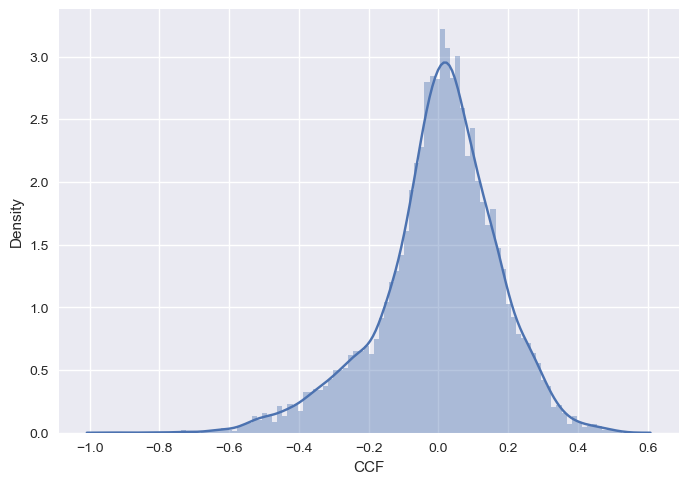

In [137]:
sns.distplot(y_test_ead - y_pred_test_ead, bins=100)
plt.show()

In [138]:
pd.DataFrame(y_pred_test_ead).describe()

,0
count,10809.000000
mean,0.735394
std,0.105210
min,0.350842
25%,0.660019
50%,0.731035
75%,0.810246
max,1.003761


In [139]:
y_pred_test_ead = np.where(y_pred_test_ead < 0, 0, y_pred_test_ead) 
y_pred_test_ead = np.where(y_pred_test_ead > 1, 1, y_pred_test_ead)

In [140]:
pd.DataFrame(y_pred_test_ead).describe()

,0
count,10809.000000
mean,0.735394
std,0.105209
min,0.350842
25%,0.660019
50%,0.731035
75%,0.810246
max,1.000000


In [141]:
mean_squared_error(y_true=y_test_ead, y_pred=y_pred_test_ead)

0.029535020345364798

In [142]:
mean_absolute_error(y_true=y_test_ead, y_pred=y_pred_test_ead)

0.12910010724795826

## EAD Model - ANNs

In [143]:
ccf_model = Sequential()

u1 = len(features)
ccf_model.add(Dense(u1, activation='relu'))

u2 = round(len(features) * 0.5)
ccf_model.add(Dense(u2, activation='relu'))
ccf_model.add(Dropout(0.2))                      

u3 = round(len(features) * 0.25)
ccf_model.add(Dense(u3, activation='relu'))
ccf_model.add(Dropout(0.2))  
                
ccf_model.add(Dense(1, activation='sigmoid'))   
                
ccf_model.compile(loss='mse', optimizer='adam')    # adam, SGD, Adagrad, RMSprop    

In [144]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0, verbose=1)   
ccf_model.fit(x=X_train_ead, y=y_train_ead, batch_size=1024, epochs=35, validation_data=(X_test_ead,y_test_ead));#, callbacks=[early_stop]);

Epoch 1/35
32/32 [==============================] - 3s 88ms/step - loss: 0.4477 - val_loss: 0.5809
Epoch 2/35
32/32 [==============================] - 0s 6ms/step - loss: 0.3842 - val_loss: 0.1537
Epoch 3/35
32/32 [==============================] - 0s 6ms/step - loss: 0.2188 - val_loss: 0.1096
Epoch 4/35
32/32 [==============================] - 0s 6ms/step - loss: 0.1471 - val_loss: 0.1096
Epoch 5/35
32/32 [==============================] - 0s 6ms/step - loss: 0.1457 - val_loss: 0.1096
Epoch 6/35
32/32 [==============================] - 0s 6ms/step - loss: 0.1360 - val_loss: 0.1096
Epoch 7/35
32/32 [==============================] - 0s 6ms/step - loss: 0.1236 - val_loss: 0.1096
Epoch 8/35
32/32 [==============================] - 0s 6ms/step - loss: 0.1255 - val_loss: 0.1096
Epoch 9/35
32/32 [==============================] - 0s 6ms/step - loss: 0.1238 - val_loss: 0.1096
Epoch 10/35
32/32 [==============================] - 0s 5ms/step - loss: 0.1214 - val_loss: 0.1096
Epoch 11/35
32/32 

In [145]:
losses = pd.DataFrame(ccf_model.history.history)
losses

,loss,val_loss
0,0.447663,0.580926
1,0.384227,0.153723
2,0.218808,0.109574
3,0.147101,0.109574
4,0.145685,0.109574
5,0.136044,0.109574
6,0.123612,0.109574
7,0.125493,0.109574
8,0.123767,0.109574
9,0.121372,0.109574


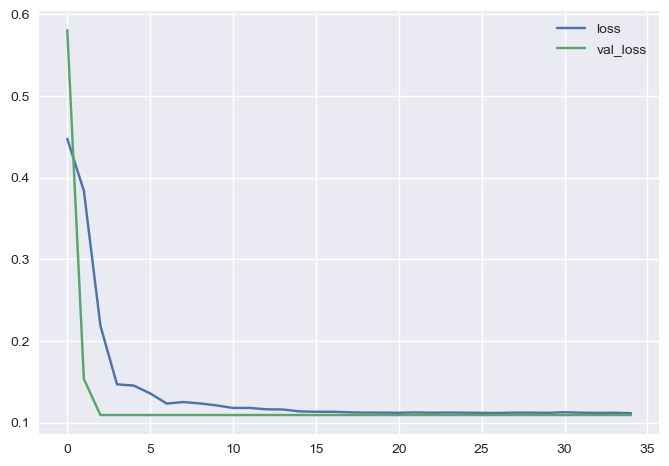

In [146]:
losses.plot();

# Calculating Expected Loss

__EL = PD * LGD * EAD = PD * (1 - RR) * (CCF * FA)__

In [147]:
df_prepr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,dti:5.6-9.1,dti:9.1-13.3,dti:13.3-16.1,dti:16.1-18.2,dti:18.2-21,dti:21-24.5,dti:24.5-26.6,dti:26.6-35,dti:>35,good_bad
452448,11324653,13236804,13150,13150,13150.0,23.70,513.85,F,F1,NaN,...,0,0,0,1,0,0,0,0,0,1
363441,19607169,21829881,5000,5000,5000.0,10.15,161.69,B,B2,Truck Driver,...,1,0,0,0,0,0,0,0,0,1
465236,10179630,12031182,24000,24000,24000.0,22.40,668.33,E,E3,Bailiff,...,0,0,0,0,0,1,0,0,0,1
194452,1575006,1843180,25000,25000,25000.0,23.28,708.79,F,F2,"KPMG, LLP",...,0,1,0,0,0,0,0,0,0,1
45189,10155973,12008043,25000,25000,25000.0,6.62,767.60,A,A2,CEO,...,1,0,0,0,0,0,0,0,0,1


In [148]:
df_prepr.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           13611
home_ownership                                                          0
annual_inc                                                              0
verification_status                                                     0
loan_status                           

In [149]:
df_prepr['mths_since_last_delinq'].fillna(0, inplace=True)
df_prepr['mths_since_last_record'].fillna(0, inplace=True)

In [150]:
df_prepr_lgd_ead = df_prepr[features_all]
df_prepr_lgd_ead = df_prepr_lgd_ead.drop(columns=ref_categories)

In [151]:
# LGD = 1 - recovery rate 
df_prepr['RR_st1'] = clf_rf_lgd_st1.predict(df_prepr_lgd_ead)
df_prepr['RR_st2'] = lm_lgd_st2.predict(df_prepr_lgd_ead)
df_prepr['RR'] = df_prepr['RR_st1'] * df_prepr['RR_st2']

df_prepr['RR'] = np.where(df_prepr['RR'] < 0, 0, df_prepr['RR'])
df_prepr['RR'] = np.where(df_prepr['RR'] > 1, 1, df_prepr['RR'])

In [152]:
df_prepr['LGD'] = 1 - df_prepr['RR']

In [153]:
df_prepr['LGD'].describe()

count    242059.000000
mean          0.940656
std           0.052309
min           0.291304
25%           0.896597
50%           0.926750
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [154]:
# EAD = CCF * funded amount
df_prepr['CCF'] = lm_ead.predict(df_prepr_lgd_ead)
df_prepr['CCF'] = np.where(df_prepr['CCF'] < 0, 0, df_prepr['CCF'])
df_prepr['CCF'] = np.where(df_prepr['CCF'] > 1, 1, df_prepr['CCF'])

In [155]:
df_prepr['EAD'] = df_prepr['CCF'] * df_prepr['funded_amnt']

In [156]:
df_prepr['EAD'].describe()

count    242059.000000
mean       9745.544368
std        6547.224707
min         183.042895
25%        4835.156648
50%        7975.691824
75%       13198.532136
max       35000.000000
Name: EAD, dtype: float64

In [157]:
df_prepr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,dti:24.5-26.6,dti:26.6-35,dti:>35,good_bad,RR_st1,RR_st2,RR,LGD,CCF,EAD
452448,11324653,13236804,13150,13150,13150.0,23.70,513.85,F,F1,NaN,...,0,0,0,1,1,0.143021,0.143021,0.856979,0.780867,10268.398172
363441,19607169,21829881,5000,5000,5000.0,10.15,161.69,B,B2,Truck Driver,...,0,0,0,1,0,0.133377,0.000000,1.000000,0.756130,3780.650643
465236,10179630,12031182,24000,24000,24000.0,22.40,668.33,E,E3,Bailiff,...,0,0,0,1,0,0.150630,0.000000,1.000000,0.881344,21152.255351
194452,1575006,1843180,25000,25000,25000.0,23.28,708.79,F,F2,"KPMG, LLP",...,0,0,0,1,1,0.131732,0.131732,0.868268,0.835973,20899.326132
45189,10155973,12008043,25000,25000,25000.0,6.62,767.60,A,A2,CEO,...,0,0,0,1,1,0.133984,0.133984,0.866016,0.701693,17542.318526


In [158]:
df_X_pd = df_prepr

In [159]:
df_X_pd.shape

(242059, 253)

In [160]:
df_X_pd.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,dti:24.5-26.6,dti:26.6-35,dti:>35,good_bad,RR_st1,RR_st2,RR,LGD,CCF,EAD
452448,11324653,13236804,13150,13150,13150.0,23.70,513.85,F,F1,NaN,...,0,0,0,1,1,0.143021,0.143021,0.856979,0.780867,10268.398172
363441,19607169,21829881,5000,5000,5000.0,10.15,161.69,B,B2,Truck Driver,...,0,0,0,1,0,0.133377,0.000000,1.000000,0.756130,3780.650643
465236,10179630,12031182,24000,24000,24000.0,22.40,668.33,E,E3,Bailiff,...,0,0,0,1,0,0.150630,0.000000,1.000000,0.881344,21152.255351
194452,1575006,1843180,25000,25000,25000.0,23.28,708.79,F,F2,"KPMG, LLP",...,0,0,0,1,1,0.131732,0.131732,0.868268,0.835973,20899.326132
45189,10155973,12008043,25000,25000,25000.0,6.62,767.60,A,A2,CEO,...,0,0,0,1,1,0.133984,0.133984,0.866016,0.701693,17542.318526


In [161]:
features_all_pd = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_TN_MS_IN_NV',
'addr_state:AL_NM_OK',
'addr_state:FL_AR_LA',
'addr_state:MI_MO_PA',                                                                              
'addr_state:NY',
'addr_state:IA_NC_KY_OH_MD_HI',
'addr_state:NJ_VA_DE_MN_AZ',
'addr_state:WI_RI_GA',
'addr_state:SD_MA_IL_UT',                                       
'addr_state:CA',
'addr_state:MT_AK_WA_OR_SC',
'addr_state:TX',
'addr_state:VT_CT_WV_KS_CO',
'addr_state:NH_WY_ID_DC_ME',                                        
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',  
'purpose:sm_b__mov__oth__med__edu',                                       
'purpose:ren_en__vac__house__home_impr',
'purpose:debt_consolidation',                                            
'purpose:major_purch__wed__car',
'purpose:credit_card',                                             
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',                                        
'emp_length:0',
'emp_length:1',
'emp_length:2-5',
'emp_length:6-9',
'emp_length:10',                                         
'mths_since_issue_d:<106',
'mths_since_issue_d:106-117',
'mths_since_issue_d:117-140',
'mths_since_issue_d:140-149',                                       
'mths_since_issue_d:149-156', 
'mths_since_issue_d:156-167',
'mths_since_issue_d:167-174',                                       
'mths_since_issue_d:>=174',  
'int_rate:<=8.31',
'int_rate:8.31-13.263',
'int_rate:13.263-18.63',
'int_rate:18.63-23.583',
'int_rate:>23.583',                                                                                                                             
'delinq_2yrs:0',
'delinq_2yrs:1',                                       
'delinq_2yrs:2-6',
'delinq_2yrs:>=7',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-5',
'inq_last_6mths:>=6',                                       
'pub_rec:0',
'pub_rec:1',                                       
'pub_rec:2-3',
'pub_rec:>=4',           
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'dti:<=5.6',
'dti:5.6-9.1',
'dti:9.1-13.3',
'dti:13.3-16.1',
'dti:16.1-18.2',
'dti:18.2-21',
'dti:21-24.5',
'dti:24.5-26.6',
'dti:26.6-35',
'dti:>35']

In [162]:
ref_categories_pd = ['grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',                  
'addr_state:ND_NE_TN_MS_IN_NV',
'verification_status:Verified',
'purpose:sm_b__mov__oth__med__edu',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>=174',                 
'int_rate:>23.583',          
'delinq_2yrs:>=7',
'inq_last_6mths:>=6',
'pub_rec:>=4',
'annual_inc:<20K',                       
'dti:>35']

In [163]:
df_X_pd = df_X_pd[features_all_pd]
df_X_pd = df_X_pd.drop(columns=ref_categories_pd)
df_X_pd.shape

(242059, 73)

In [164]:
from tensorflow.keras.models import load_model

In [165]:
pd_model = load_model('pd_ann_model.h5')

In [166]:
df_prepr['PD'] = 1 - pd_model.predict(df_X_pd)   # 1 minus the probability of being a good borrower
df_prepr['PD'].head()

7565/7565 [==============================] - 13s 2ms/step


452448    0.691884
363441    0.416581
465236    0.721292
194452    0.665117
45189     0.123778
Name: PD, dtype: float32

In [167]:
df_prepr['PD'].describe()

count    242059.000000
mean          0.416813
std           0.173191
min           0.061221
25%           0.284282
50%           0.408748
75%           0.550898
max           0.852599
Name: PD, dtype: float64

In [168]:
df_prepr.shape

(242059, 254)

In [169]:
df_prepr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,dti:26.6-35,dti:>35,good_bad,RR_st1,RR_st2,RR,LGD,CCF,EAD,PD
452448,11324653,13236804,13150,13150,13150.0,23.70,513.85,F,F1,NaN,...,0,0,1,1,0.143021,0.143021,0.856979,0.780867,10268.398172,0.691884
363441,19607169,21829881,5000,5000,5000.0,10.15,161.69,B,B2,Truck Driver,...,0,0,1,0,0.133377,0.000000,1.000000,0.756130,3780.650643,0.416581
465236,10179630,12031182,24000,24000,24000.0,22.40,668.33,E,E3,Bailiff,...,0,0,1,0,0.150630,0.000000,1.000000,0.881344,21152.255351,0.721292
194452,1575006,1843180,25000,25000,25000.0,23.28,708.79,F,F2,"KPMG, LLP",...,0,0,1,1,0.131732,0.131732,0.868268,0.835973,20899.326132,0.665117
45189,10155973,12008043,25000,25000,25000.0,6.62,767.60,A,A2,CEO,...,0,0,1,1,0.133984,0.133984,0.866016,0.701693,17542.318526,0.123778


In [170]:
df_prepr.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,dti:26.6-35,dti:>35,good_bad,RR_st1,RR_st2,RR,LGD,CCF,EAD,PD
319880,24805157,27238150,9500,9500,9500.0,13.98,324.60,C,C3,carpenter,...,1,0,1,0,0.144244,0.000000,1.000000,0.777850,7389.571372,0.684654
193559,1584052,1853220,25600,25600,25600.0,21.00,692.57,E,E2,baywoods of annapolis,...,1,0,0,1,0.128264,0.128264,0.871736,0.830791,21268.252360,0.701324
202497,1477955,1736035,9475,9475,9450.0,15.31,329.90,C,C2,Animal specialty and emergency center,...,0,0,1,1,0.086298,0.086298,0.913702,0.642075,6083.659777,0.419168
33990,454549,562956,16750,16750,16750.0,14.61,577.46,D,D1,NaN,...,0,0,1,1,0.071312,0.071312,0.928688,0.606086,10151.937121,0.298262
144020,4567438,5819733,34475,34475,34475.0,17.27,861.81,C,C5,G2,...,0,0,0,1,0.106679,0.106679,0.893321,0.789870,27230.765895,0.549904


In [171]:
# Expected Loss
df_prepr['EL'] = df_prepr['PD'] * df_prepr['LGD'] * df_prepr['EAD']

In [172]:
df_prepr['EL'].describe()

count    242059.000000
mean       4101.836784
std        3818.015403
min          31.730558
25%        1459.792017
50%        2754.607947
75%        5488.395968
max       26853.855930
Name: EL, dtype: float64

In [173]:
df_prepr[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,PD,LGD,EAD,EL
452448,13150,0.691884,0.856979,10268.398172,6088.445973
363441,5000,0.416581,1.000000,3780.650643,1574.946455
465236,24000,0.721292,1.000000,21152.255351,15256.955488
194452,25000,0.665117,0.868268,20899.326132,12069.360633
45189,25000,0.123778,0.866016,17542.318526,1880.428505


In [174]:
df_prepr['EL'].sum()

992886510.0550447